In [23]:
import importlib
import numpy as np
import cv2
from matplotlib import pyplot as plt
from os.path import join
import os
import seaborn as sns
import lib.utils_RSA as rsa

importlib.reload(rsa)



<module 'lib.utils_RSA' from '/home/alban/SAYCam_Vs_EGO4D/lib/utils_RSA.py'>

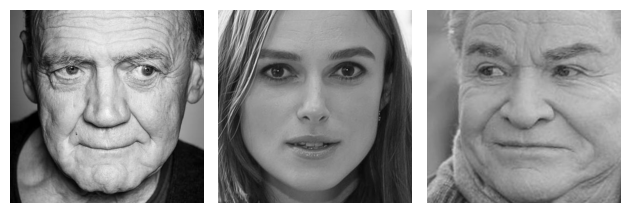

In [24]:
# First look at some of the images
dataset = 'MEG_face_stim' # alternatively 100_faces or hm_IT
path2dataset = f'testsets/{dataset}'

listimages = os.listdir(path2dataset)
import random
random.shuffle(listimages)
fig, subs = plt.subplots(1,3)
for i, img in enumerate(listimages[:3]):
    img = cv2.imread(join(path2dataset, img))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    subs[i].imshow(img)
    subs[i].axis('off')
fig.tight_layout()
plt.show()

In [25]:
img.shape

(500, 500, 3)

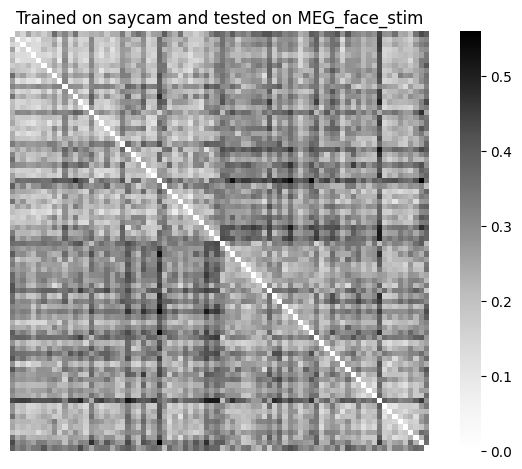

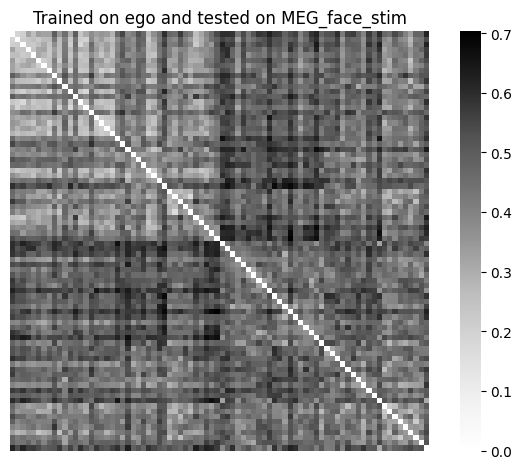

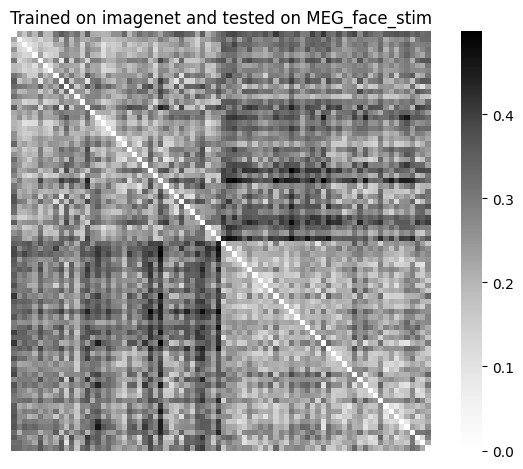

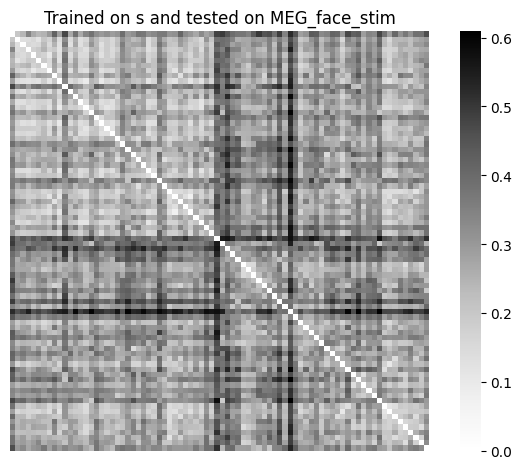

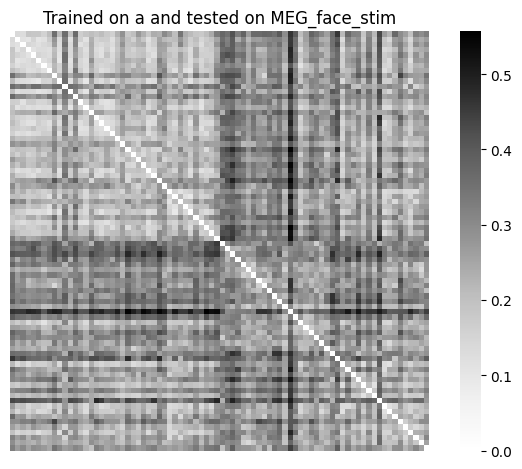

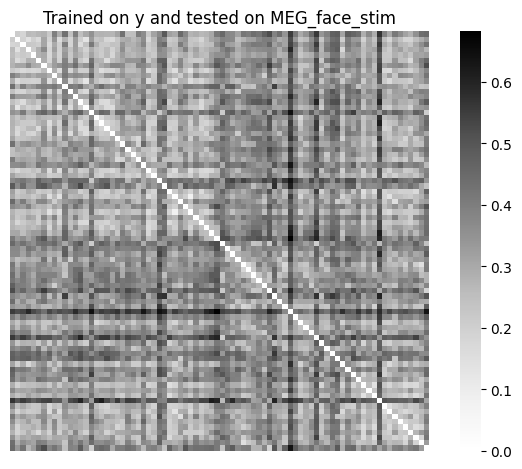

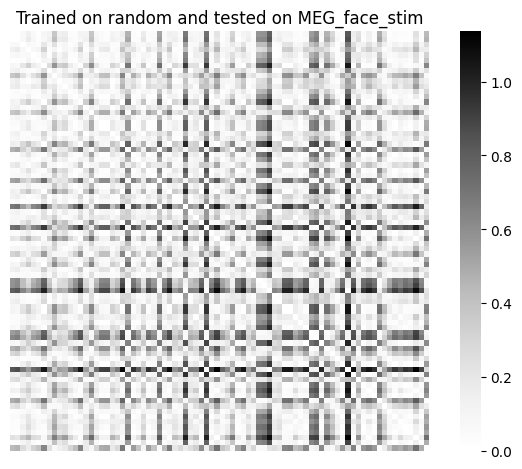

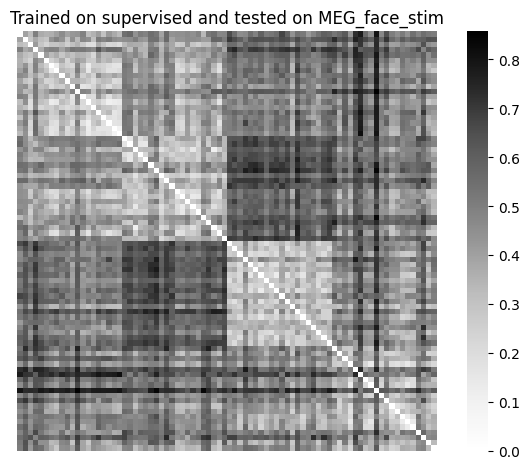

In [26]:
models = ['saycam', 'ego', 'imagenet', 's', 'a', 'y', 'random', 'supervised']
from natsort import natsorted

listimages = os.listdir(path2dataset)
listimages = natsorted(listimages) # for hm_IT dataset or
#listimages = sorted(listimages, key=sort_key) #for 100_faces
#print(listimages)

RDMs = {}
for i, model in enumerate(models):
    RDMs[model] = rsa.compute_RDMs(model, dataset, listimages)

In [27]:
for model in models:
    print(f'{np.min(RDMs[model])} and {np.max(RDMs[model])}')

0.0 and 0.5595478375848352
0.0 and 0.7028708928576152
0.0 and 0.4985421140089187
0.0 and 0.609043536668121
0.0 and 0.5568298803465443
0.0 and 0.682185123657872
0.0 and 1.3511166311343805
0.0 and 0.8576053187321726


In [28]:
SIMs = rsa.corrs_layers(RDMs, models)


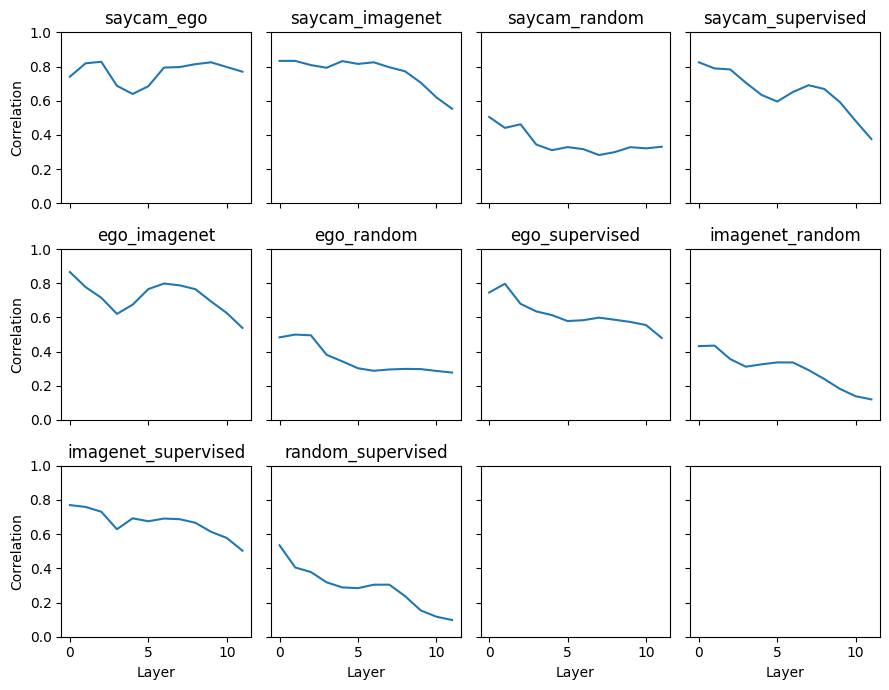

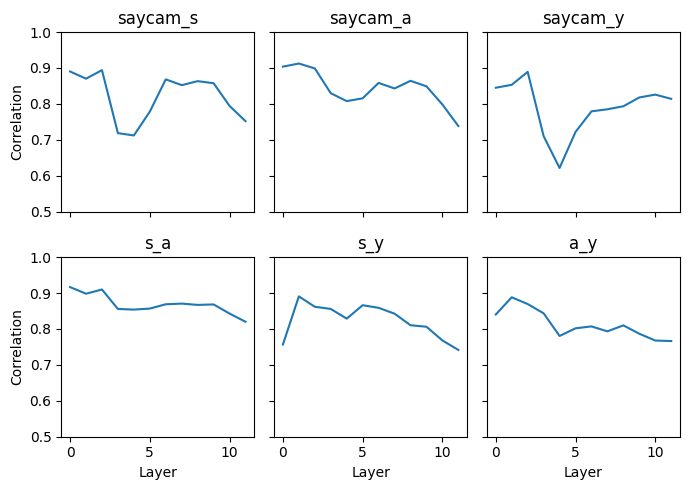

In [29]:
importlib.reload(rsa)
rsa.plot_similarities(SIMs, ['saycam', 'ego', 'imagenet', 'random', 'supervised'])
rsa.plot_similarities(SIMs, ['saycam', 's', 'a', 'y'])

Running t-SNE on dissimilarity matrix...


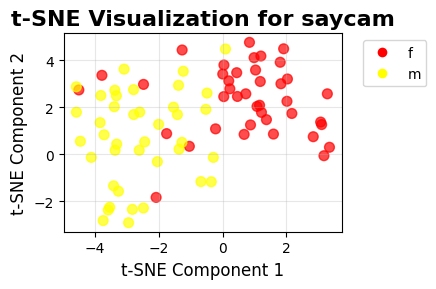

Silhouette Score: 0.327
Number of unique labels: 2

Label distribution:
  f: 40 images
  m: 40 images
K-Means ARI: 0.520
Running t-SNE on dissimilarity matrix...


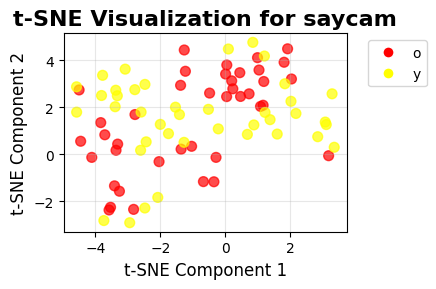

Silhouette Score: 0.008
Number of unique labels: 2

Label distribution:
  o: 40 images
  y: 40 images
K-Means ARI: -0.007
Running t-SNE on dissimilarity matrix...


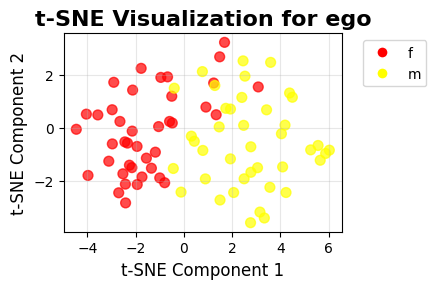

Silhouette Score: 0.366
Number of unique labels: 2

Label distribution:
  f: 40 images
  m: 40 images
K-Means ARI: 0.520
Running t-SNE on dissimilarity matrix...


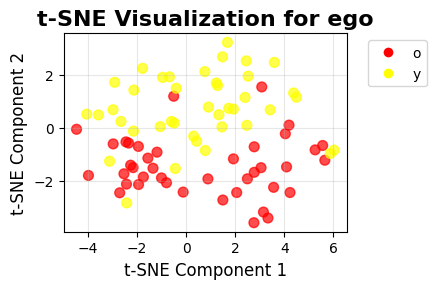

Silhouette Score: 0.145
Number of unique labels: 2

Label distribution:
  o: 40 images
  y: 40 images
K-Means ARI: -0.012
Running t-SNE on dissimilarity matrix...


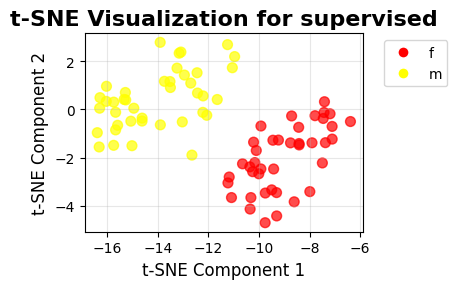

Silhouette Score: 0.577
Number of unique labels: 2

Label distribution:
  f: 40 images
  m: 40 images
K-Means ARI: 1.000
Running t-SNE on dissimilarity matrix...


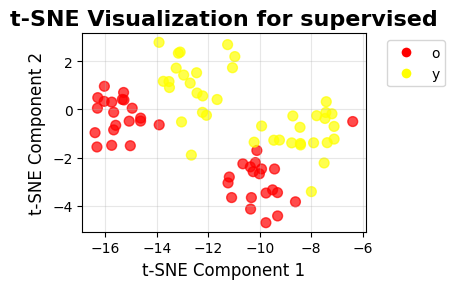

Silhouette Score: 0.202
Number of unique labels: 2

Label distribution:
  o: 40 images
  y: 40 images
K-Means ARI: -0.013


In [31]:
# Main execution
importlib.reload(rsa)
identity = list(); gender = list(); age = list()
count = 0
previousID = listimages[0][:7] # first identity
for i, img in enumerate(listimages):
    currentID = img[:7]
    split = img.split('_')
    gender.append(split[0])
    age.append(split[1])
    if currentID != previousID:
        count += 1
        previousID = currentID
    identity.append(count)

# For demonstration, run with synthetic data
title = "t-SNE Visualization for saycam"
tsne_results, labels = rsa.complete_tsne_pipeline(RDMs['saycam'][-1], gender, title)
tsne_results, labels = rsa.complete_tsne_pipeline(RDMs['saycam'][-1], age, title)
#tsne_results, labels = rsa.complete_tsne_pipeline(RDMs['saycam'][-1], identity, title)

title = "t-SNE Visualization for ego"
tsne_results, labels = rsa.complete_tsne_pipeline(RDMs['ego'][-1], gender, title)
tsne_results, labels = rsa.complete_tsne_pipeline(RDMs['ego'][-1], age, title)
#tsne_results, labels = rsa.complete_tsne_pipeline(RDMs['ego'][-1], identity, title)

title = "t-SNE Visualization for supervised"
tsne_results, labels = rsa.complete_tsne_pipeline(RDMs['supervised'][-1], gender, title)
tsne_results, labels = rsa.complete_tsne_pipeline(RDMs['supervised'][-1], age, title)
#tsne_results, labels = rsa.complete_tsne_pipeline(RDMs['supervised'][-1], identity, title)

